### Task2 :- Prediction using Unsupervised ML
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 
### Author :- Aviral Gupta
### GRIP MAY21

In [2]:
### STEP 1 : Importing required libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
### STEP 2 : Loading the dataset 

In [10]:
iris = pd.read_csv(r'C:\Users\Wind-7 Professional\Desktop\ML project\Iris.csv')

In [11]:
### STEP 3 : shows top 5 rows

In [12]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
### STEP 4 : here, Removing unwanted columns

In [14]:
iris.pop('Id')

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [15]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [16]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [18]:
### STEP 5 : Checking if any null value is present 

In [19]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
### STEP 6 : Checking if data is balanced or not

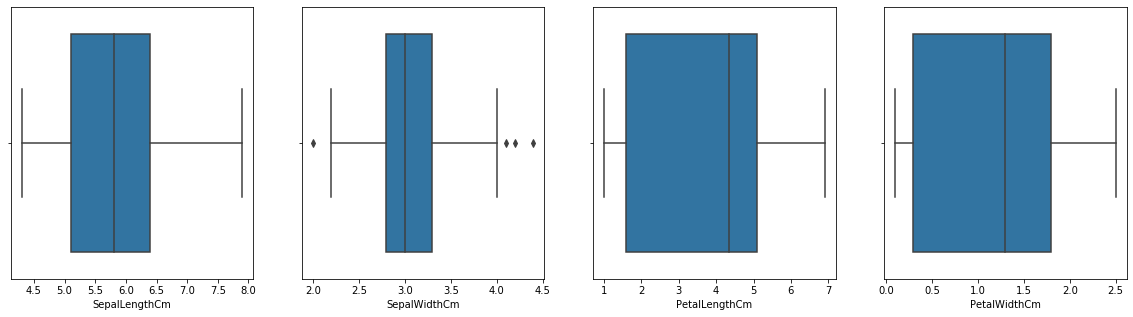

In [21]:
plt.figure(figsize=(20,5))
k=1
for i in iris.iloc[:,:-1].columns:
    plt.subplot(1,4,k)
    sns.boxplot(iris[i])
    k+=1

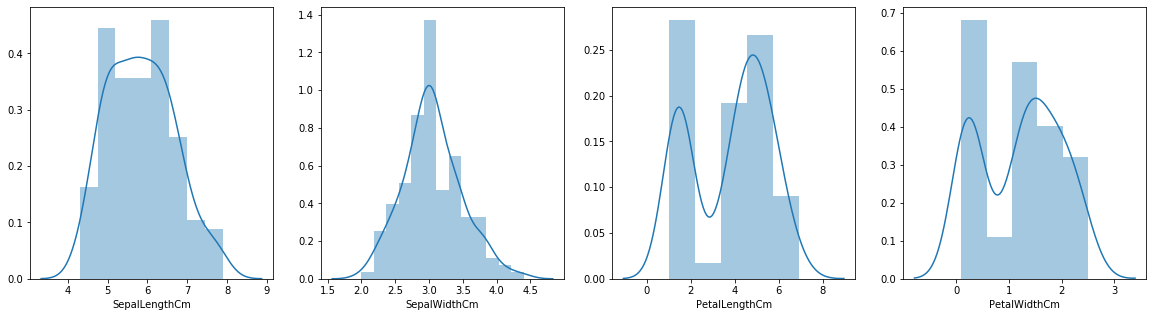

In [22]:
plt.figure(figsize=(20,5))
k=1
for i in iris.iloc[:,:-1].columns:
    plt.subplot(1,4,k)
    sns.distplot(iris[i])
    k+=1

In [23]:
### STEP 7 : Adjusting columns

In [24]:
ic=iris.iloc[:,:-1].values
ic

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
### STEP 8 : Using K Means clustering method

In [26]:
j=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=100)
    kmeans.fit(ic)
    j.append(kmeans.inertia_)

In [27]:
### STEP 9 : Calculating no. of clusters using elbow method 
#here as it is seen that n=3

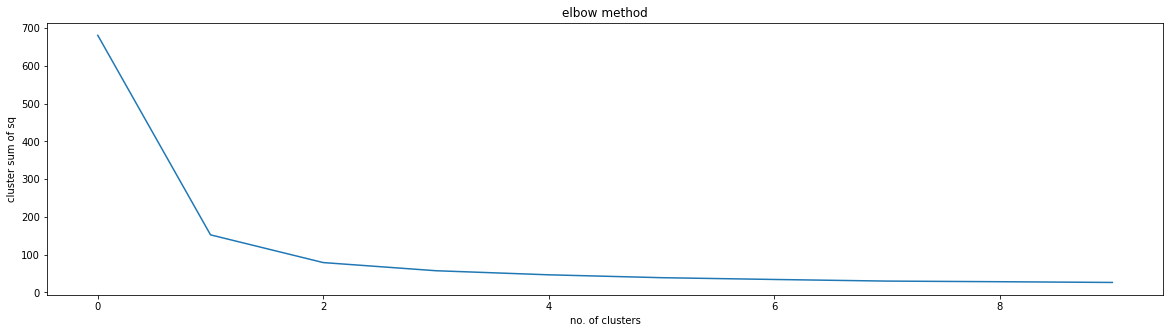

In [28]:
plt.figure(figsize=(20,5))
plt.plot(j)
plt.title("elbow method")
plt.xlabel("no. of clusters")
plt.ylabel("cluster sum of sq")
plt.show()

In [29]:
### STEP 10 : Using Kmean clustering with n=3

In [30]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(ic)

In [31]:
### STEP 11 : Visualization

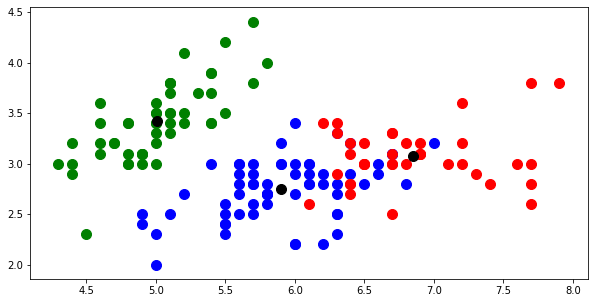

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(ic[y_kmeans==0,0],ic[y_kmeans==0,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(ic[y_kmeans==1,0],ic[y_kmeans==1,1],s=100,c='green',label='Iris-versicolour')
plt.scatter(ic[y_kmeans==2,0],ic[y_kmeans==2,1],s=100,c='red',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centeroids')

plt.show()

In [33]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [34]:
pd.Series(y_kmeans).value_counts()

0    62
1    50
2    38
dtype: int64

In [35]:
y_pred=pd.DataFrame(iris.Species)
y_pred['KMeans_Prediction']=pd.Series(y_kmeans,index=np.arange(1,len(iris.Species)+1))
y_pred.KMeans_Prediction=y_pred.KMeans_Prediction.astype('str')

for i in y_pred.KMeans_Prediction.unique():
    pred_value=y_pred.Species[y_pred.KMeans_Prediction==i].mode().values[0]
    y_pred.KMeans_Prediction.replace(i,pred_value,inplace=True)
    print('i',i,'pred',pred_value)
    

i nan pred Iris-setosa
i 1.0 pred Iris-setosa
i 0.0 pred Iris-versicolor
i 2.0 pred Iris-virginica


In [ ]:
### step 12 :-shows starting 5 element

In [36]:
y_pred.head()

,Species,KMeans_Prediction
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa


In [37]:
((len(y_pred)-len(y_pred[y_pred.Species!=y_pred.KMeans_Prediction]))/len(y_pred))*100

88.66666666666667

In [38]:
irispred=iris.copy()
irispred['pred_value']=y_pred.KMeans_Prediction
irispred[irispred.Species!=irispred.pred_value]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,pred_value
50,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-versicolor
102,7.1,3.0,5.9,2.1,Iris-virginica,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-versicolor
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-versicolor
115,6.4,3.2,5.3,2.3,Iris-virginica,Iris-versicolor
120,6.9,3.2,5.7,2.3,Iris-virginica,Iris-versicolor
122,7.7,2.8,6.7,2.0,Iris-virginica,Iris-versicolor


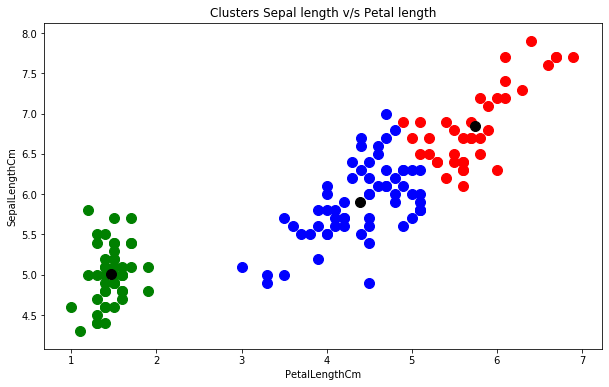

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(irispred.iloc[y_kmeans==0,2],irispred.iloc[y_kmeans==0,0],s=100,c='blue',label='cluster 1')
plt.scatter(irispred.iloc[y_kmeans==1,2],irispred.iloc[y_kmeans==1,0],s=100,c='green',label='cluster 2')
plt.scatter(irispred.iloc[y_kmeans==2,2],irispred.iloc[y_kmeans==2,0],s=100,c='red',label='cluster 3')

plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,0],s=100,c='black',label='centeroids')
plt.title("Clusters Sepal length v/s Petal length")
plt.xlabel("PetalLengthCm")
plt.ylabel("SepalLengthCm")
plt.show()